In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
# pip install ucimlrepo

## 1. Import Data
Dataset ini berisi data kimiawi dari anggur yang diklasifikasikan dalam 13 fitur kimia seperti alkohol, kandungan asam dan flavonoid. Dataset ini memiliki 13 fitur dan 178 data.

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

In [5]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Standarisasi data

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_scaled[0:15]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401],
       [ 1.48155459, -0.517366

## 3. Reduksi Dimensi dengan PCA

Fitur-fitur dalam dataset ini mungkin berkorelasi, dan PCA dapat digunakan untuk mereduksi dimensi dan meningkatkan kinerja algoritma clustering. Kalau ada kolinieritas tinggi:
- Variabel yang berkorelasi memberi bobot ganda pada perhitungan jarak.
- Ini bisa bikin hasil cluster bias → seolah-olah variabel itu lebih penting, padahal informasinya hampir sama.

PCA (Principal Component Analysis) bisa membantu:
- Menghilangkan kolinieritas → karena PCA menghasilkan komponen ortogonal (independen).
- Mereduksi dimensi → menjaga informasi utama, membuang noise.
- Membuat clustering lebih stabil & representatif.

Tapi, ada konsekuensinya:

- Interpretasi hasil cluster jadi lebih susah → karena cluster terbentuk dari principal components, bukan variabel asli
- PCA bisa membuat interpretasi kurang intuitif.

In [11]:
# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [12]:
X_pca[0:15]

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240111],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558]])

## 4. Clustering

Kita akan menerapkan Agglomerative pada data yang telah direduksi dimensinya menggunakan PCA. 

In [15]:
cluster_average = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average').fit(X_pca)  
cluster_complete = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete').fit(X_pca)  
cluster_single = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single').fit(X_pca)  
cluster_ward = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward').fit(X_pca)

In [16]:
wine['labels_average'] = pd.DataFrame(cluster_average.labels_)[0]
wine['labels_complete'] = pd.DataFrame(cluster_complete.labels_)[0]
wine['labels_single'] = pd.DataFrame(cluster_single.labels_)[0]
wine['labels_ward'] = pd.DataFrame(cluster_ward.labels_)[0]

## 5. Visualisasi Hasil Clustering

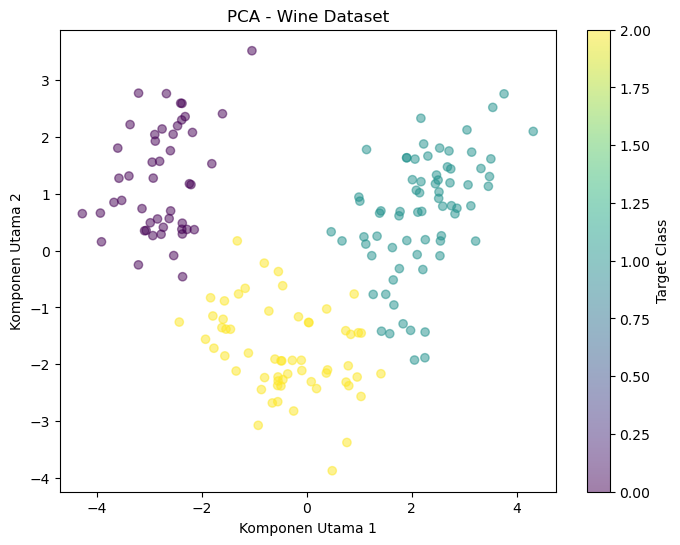

In [18]:
# Plot hasil PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, c=cluster_average.labels_, cmap='viridis')
plt.title('PCA - Wine Dataset')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='Target Class')
plt.show()

# Reference
- https://archive.ics.uci.edu/dataset/109/wine